In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
%matplotlib inline

In [226]:
data = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [83]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

## Начнем с  библиотеки Seaborn

Выберем пять признаков из первоначального датасета и построим pairplot.
Признаки, которые будем использовать:
* budget - бюджет фильма (количественный признак)
* popularity - популярность (количественный признак)
* revenue - доход (количественный признак)
* vote_average - средняя оценка (количественный признак)
* vote_count - количество оценок (количественный признак)

In [12]:
feauteres_corr = ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count']

Построим pairplot чтобы увидеть зависимости признаков друг от друга (корреляцию), а также распределение.

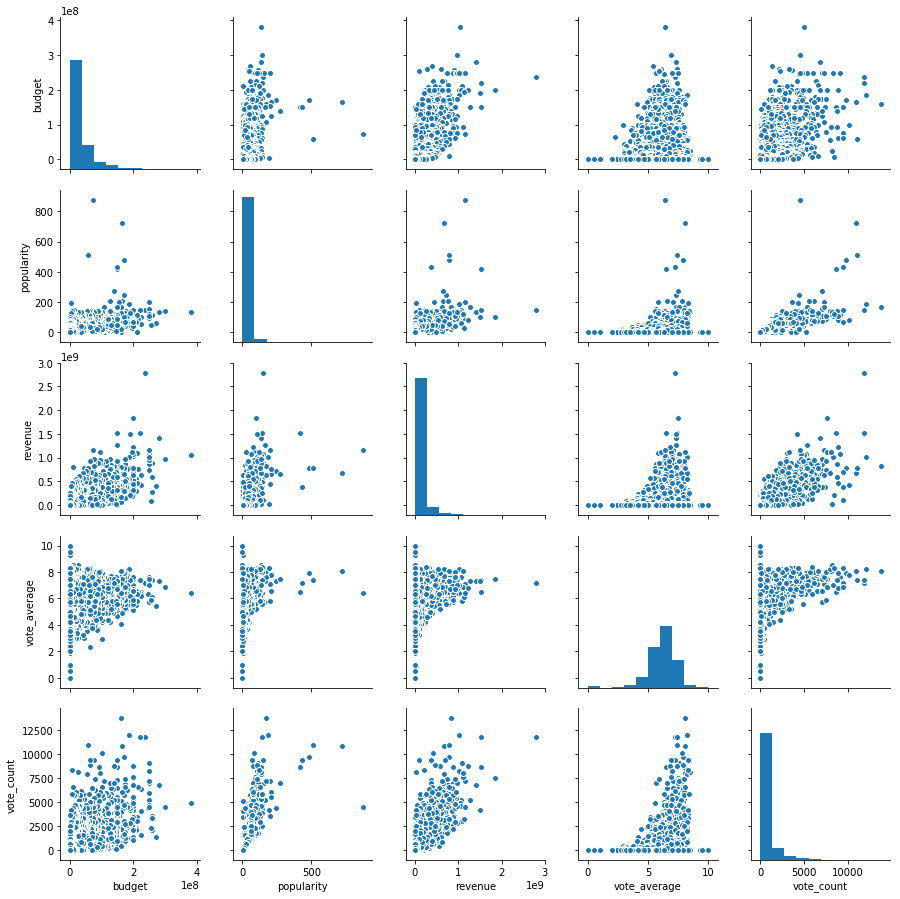

In [18]:
sns.pairplot(data[feauteres_corr])

По данным диаграммам видно, что фильмы с большим бюджетом реже встречаются с плохой оценкой, также происходит если высокий доход у фильма. Ожидаемая зависимость дохода от бюджета фильма.

__Посмотрим более детально на распределение некоторых признаков.__

Распределение средней оценки фильма:

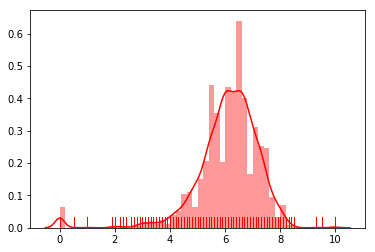

In [26]:
sns.distplot(data[['vote_average']], hist=True, rug=True, color="r")

Распределение бюджета фильма:

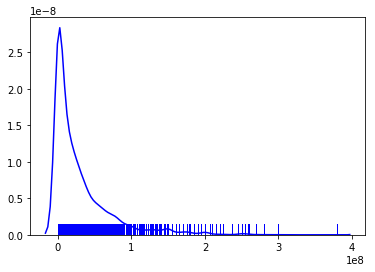

In [27]:
sns.distplot(data[['budget']], hist=False, rug=True, color="b")

Распределение дохода фильма:

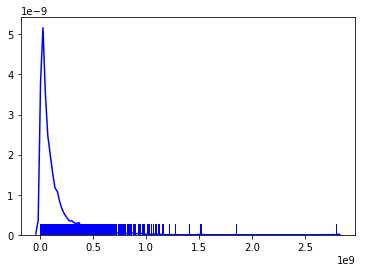

In [28]:
sns.distplot(data[['revenue']], hist=False, rug=True, color="b")

## Перейдем к рассмотрению следующей библиотеки

In [137]:
import numpy as np

In [148]:
values = list(dict(data.original_language.value_counts()).values())
labels = list(dict(data.original_language.value_counts()).keys())

__Построим гистограмму категориального признака original_language (язык оригинала фильма).__

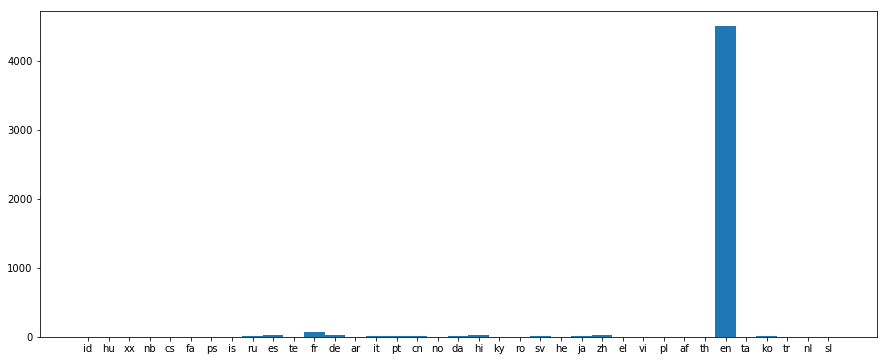

In [163]:
indexes = np.arange(len(labels))
width = 1
plt.figure(figsize=[15, 6])
plt.bar(indexes, values, width, align='edge')
plt.xticks(indexes + width * 0.5, labels)

plt.show()

Для построения с помощью pyplot мы использовали много лишних действий. Покажем как это можно было сделать с помощью seaborn используя метод __countplot__.

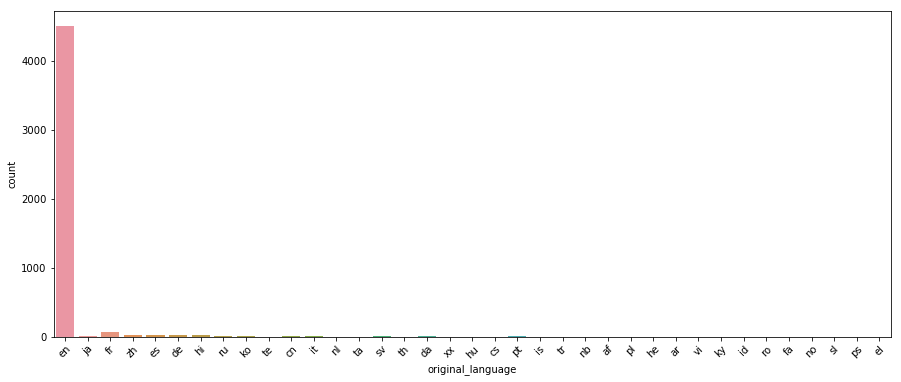

In [166]:
plt.figure(figsize = (15, 6))
sns.countplot(x = 'original_language', data = data)
xt = plt.xticks(rotation=45)

## Рассмотрим последнюю библиотеку plotly.

In [167]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Посмотрим на boxplot оценок и бюджетов фильма. 

In [229]:
trace = go.Box(
    y=np.array(data.vote_average)
)

df = [trace]
iplot(df, show_link=False)

С помощью интерактивной библиотеке plotly можно узнать, что медианная оценка фильма - 6.2, нижний квартиль - 5.6, верхний квартиль - 6.8.

In [230]:
trace = go.Box(
    y=np.array(data.budget)
)

df1 = [trace]
iplot(df1, show_link=False)

Медианная стоимость фильма - 15 млн $, нижний квартиль - 0.785 млн $, верхний квартиль - 40 млн $.